In [299]:
from matplotlib.colors import Normalize
import matplotlib.patches as patches
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import json
from mplsoccer.pitch import Pitch
from pandas.io.json import json_normalize


In [300]:
with open('config/plot_config.json') as config_file:
    config = json.load(config_file)    

height = 80
width = 120

NameError: name 'max_player_count' is not defined

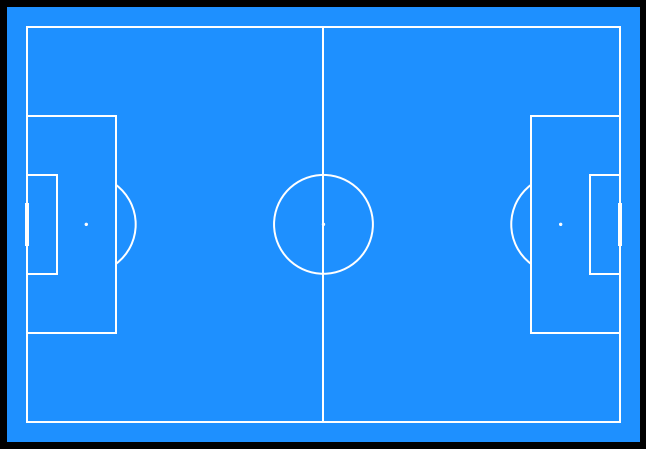

In [301]:
fig,ax = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor('black')
ax.patch.set_facecolor('violet')

pitch = Pitch(
    pitch_type = 'statsbomb',
    orientation = 'horizontal',
    pitch_color = 'dodgerblue',
    line_color = 'white',
    figsize = (13.5,8),
    constrained_layout = False,
    tight_layout = True
)
pitch.draw(ax=ax)
gca = plt.gca()
gca.invert_yaxis()

player_position['origin_pos_y'] = player_position['origin_pos_y'] * 1.2
player_position['origin_pos_x'] = player_position['origin_pos_x'] * 0.8

max_player_count = player_pass_count.num_passes.max() if max_player_count is None else max_player_count
max_player_value = player_pass_value.pass_value.max() if max_player_value is None else max_player_value
max_pair_count = pair_pass_count.num_passes.max() if max_pair_count is None else max_pair_count
max_pair_value = pair_pass_value.pass_value.max() if max_pair_value is None else max_pair_value

if config['plot_edges']:
    pair_stats = pd.merge(pair_pass_count, pair_pass_value, left_index=True, right_index=True)
    for pair_key, row in pair_stats.iterrows():
        player1, player2 = pair_key.split('_')
        
        player1_x = player_position.loc[player1]['origin_pos_x']
        player1_y = player_position.loc[player1]['origin_pos_y']
        
        player2_x = player_position.loc[player2]["origin_pos_x"]
        player2_y = player_position.loc[player2]["origin_pos_y"]

        num_passes = row["num_passes"]
        pass_value = row["pass_value"]
        
        line_width = _change_range(num_passes, (0, max_pair_count), (config["min_edge_width"], config["max_edge_width"]))
        norm = Normalize(vmin=0, vmax=max_pair_value)
        edge_cmap = cm.get_cmap(config["nodes_cmap"])
        edge_color = edge_cmap(norm(pass_value))

        ax.plot([player1_x, player2_x], [player1_y, player2_y],
                'w-', linestyle='-', alpha=1, lw=line_width, zorder=3, color=edge_color)



player_stats = pd.merge(player_pass_count, player_pass_value, left_index=True, right_index=True)
for player_name, row in player_stats.iterrows():
    player_x = player_position.loc[player_name]["origin_pos_x"]
    player_y = player_position.loc[player_name]["origin_pos_y"]

    num_passes = row["num_passes"]
    pass_value = row["pass_value"]

    marker_size = _change_range(num_passes, (0, max_player_count), (config["min_node_size"], config["max_node_size"]))
    norm = Normalize(vmin=0, vmax=max_player_value)
    node_cmap = cm.get_cmap(config["nodes_cmap"])
    node_color = node_cmap(norm(pass_value))

    ax.plot(player_x, player_y, '.', color=node_color, markersize=marker_size, zorder=5)
    ax.plot(player_x, player_y, '.', color=background_color, markersize=marker_size-20, zorder=6)
    ax.annotate(player_name, xy=(player_x, player_y), ha="center", va="center", zorder=7,
                fontsize=config["font_size"], color=config["font_color"], weight='bold',
                path_effects=[pe.withStroke(linewidth=2, foreground=background_color)])

    
    
    
    
ax.annotate("@SergioMinuto90", xy=(0.99*width, 0.02*height),
                ha="right", va="bottom", zorder=7, fontsize=10, color=config["lines_color"])
if legend:
    ax.annotate(legend, xy=(0.01*width, 0.02*height),
                    ha="left", va="bottom", zorder=7, fontsize=10, color=config["lines_color"])

if title:
    ax.set_title(title, loc="left")



In [ ]:
pickup_team = 'Argentina'
competition_id = 43

In [ ]:
# get pickup match id

matches_path = '/work/friendsof/assets/open-data-master/data/matches/'
with open(matches_path + str(competition_id)+'/3.json')as f:
    matches= json.load(f)

match_ids = []
for match in matches:
    home_team_name = match['home_team']['home_team_name']
    away_team_name = match['away_team']['away_team_name']
    if home_team_name==pickup_team or away_team_name==pickup_team:
        match_ids.append(match['match_id'])
        
match_ids = sorted(match_ids)


In [323]:
# get lineup 
lineup_path = '/work/friendsof/assets/open-data-master/data/lineups/'
with open(lineup_path + str(match_ids[3]) + '.json') as file:
    lineup = json.load(file)

player_dict = {
    player['player_name']: player['player_nickname'] for team in lineup for player in team['lineup']
}


In [324]:
event_path = '/work/friendsof/assets/open-data-master/data/events/'
file_name = str(match_ids[3]) + '.json'
with open(event_path + file_name) as file:
    event1 = json.load(file)


In [325]:
event1 = json_normalize(event1, sep='_').assign(match_ids=match_ids[1])


event1['tactics_lineup'] = event1['tactics_lineup'].fillna(0)
starting_eleven1 = []
for dat in event1['tactics_lineup'][0]:
    starting_eleven1.append(dat['player']['name'])


substitute = []
for name in event1['substitution_replacement_name'].dropna():
    substitute.append(name)

In [326]:
opponent_name = [opponent for opponent in event1['team_name'].unique() if opponent!=pickup_team][0]
first_shot = event1[(event1['team_name']==pickup_team)&(event1['type_name']=='Shot')]['minute'].min()
success_dribble = event1[(event1['team_name']==pickup_team)&(event1['type_name']=='Dribble')&(event1['dribble_outcome_name']=='Complete')].shape[0]
dribble_attempt = event1[(event1['team_name']==pickup_team)&(event1['type_name']=='Dribble')].shape[0]
success_dribbler = event1[(event1['team_name']==pickup_team)&(event1['type_name']=='Dribble')&(event1['dribble_outcome_name']=='Complete')]['player_name']
success_dribbler_name_num = success_dribbler.value_counts()
opponent_name

'France'

In [327]:
pass_loc = event1[event1['type_name']=='Pass']['location']
ball_receipt_loc = event1[event1['type_name']=='Ball Receipt*']['location']

In [328]:
df_passes = event1[
    (event1['type_name']=='Pass')&
    (event1['pass_outcome_name'].isna())&
    (event1['team_name']==pickup_team)&
    (event1['minute']<45)
                  ].copy()

df_passes['pass_recipient_name'] = df_passes['pass_recipient_name'].apply(
                        lambda x:player_dict[x] if player_dict[x] else x
)

df_passes['player_name'] = df_passes['player_name'].apply(
                        lambda x:player_dict[x] if player_dict[x] else x
)


df_passes['origin_pos_x'] = [loc[0] for loc in df_passes['location']]
df_passes['origin_pos_y'] = [loc[1] for loc in df_passes['location']]

player_position = df_passes.groupby('player_name').agg(
    {'origin_pos_x': 'median', 'origin_pos_y': 'median'}
)
# mode = df_passes.groupby('player_name')['origin_pos_x'].apply(lambda x:x.mode())
# mode

player_pass_count = df_passes.groupby('player_name').size().to_frame('num_passes')

player_pass_value = df_passes.groupby("player_name").size().to_frame("pass_value")


df_passes['pair_key'] = df_passes.apply(
    lambda x:'_'.join(sorted([x['player_name'], x['pass_recipient_name']]))
, axis=1)
# apply axis=1 ->行

pair_pass_count = df_passes.groupby('pair_key').size().to_frame('num_passes')
pair_pass_value = df_passes.groupby('pair_key').size().to_frame('pass_value')





def _statsbomb_to_point(location, max_width=120, height=80):
    return location[0] / max_width, 1-(location[1]/max_height)

def _change_range(value, old_range, new_range):

    return ((value-old_range[0]) / (old_range[1]-old_range[0])) * (new_range[1]-new_range[0]) + new_range[0]

def draw_pass_map(ax, player_position,
                  player_pass_count, player_pass_value, 
                  pair_pass_count, pair_pass_value,
                  title="", legend="",
                  max_player_count=None, max_player_value=None, 
                  max_pair_count=None, max_pair_value=None):
    
    background_color = 'black'
    
    player_position['origin_pos_y'] = height - player_position["origin_pos_y"]
    player_position['origin_pos_x'] = player_position["origin_pos_x"]
    
    max_player_count = player_pass_count['num_passes'].max() if max_player_count is None else max_player_count
    max_player_value = player_pass_value['pass_value'].max() if max_player_value is None else max_player_value
    
    max_pair_count = pair_pass_count['num_passes'].max() if max_pair_count is None else max_pair_count
    max_pair_value = pair_pass_value['pass_value'].max() if max_pair_value is None else max_pair_value
    
    pair_stats = pd.merge(pair_pass_count, pair_pass_value, left_index=True, right_index=True)
    for pair_key, row in pair_stats.iterrows():
        
        player1, player2 = pair_key.split('_')
        
        player1_x = player_position.loc[player1]['origin_pos_x']
        player1_y = player_position.loc[player1]['origin_pos_y']
        
        player2_x = player_position.loc[player2]['origin_pos_x']
        player2_y = player_position.loc[player2]['origin_pos_y']
        
        num_passes = row['num_passes']
        pass_value = row['pass_value']
        
        line_width = _change_range(num_passes, (0, max_pair_count), (1,5))
        norm = Normalize(vmin=0, vmax=max_pair_value)
        edge_cmap = cm.get_cmap('cool')
        edge_color = edge_cmap(norm(pass_value))
        
        ax.plot([player1_x, player2_x], [player1_y, player2_y],
                    'w-', linestyle='-', alpha=1, lw=line_width, zorder=3, color=edge_color)
        
    player_stats = pd.merge(player_pass_count, player_pass_value, left_index=True, right_index=True)
    for player_name, row in player_stats.iterrows():
        
        player_x = player_position.loc[player_name]['origin_pos_x']
        player_y = player_position.loc[player_name]['origin_pos_y']
        
        num_passes = row['num_passes']
        pass_value = row['pass_value']
        
        marker_size = _change_range(num_passes, (0, max_player_count), (25, 100))
        norm = Normalize(vmin=0, vmax=max_player_value)
        node_cmap = cm.get_cmap('coolwarm')
        node_color = node_cmap(norm(pass_value))
        
        ax.plot(player_x, player_y, '.', color=node_color, 
                markersize=marker_size, zorder=5)
        ax.plot(player_x, player_y, '.', color='dodgerblue',
                markersize=marker_size-35, zorder=6)
        ax.annotate(player_name, xy=(player_x, player_y), ha='center',
                    va="top", zorder=7,
                    fontsize=12, color='aliceblue', weight='bold',
                    path_effects=[pe.withStroke(linewidth=1.5, foreground=background_color)]
                                  )
        
    ax.annotate("@Bucciaratime  Data source:statsbomb", xy=(38, -4),
                ha="right", va="bottom", zorder=7, fontsize=10, color='aliceblue')

    if legend:
        ax.annotate(legend, xy=(0.01, 0.02),
                    ha="left", va="bottom", zorder=7, fontsize=10, color='aliceblue')

    ax.annotate(f"Argentina vs {opponent_name} [2018 WorldCup]", xy=(88, 80),
                ha="right", va="bottom", zorder=7, fontsize=20, color='white', weight='bold')


        
        
    return ax
        
    

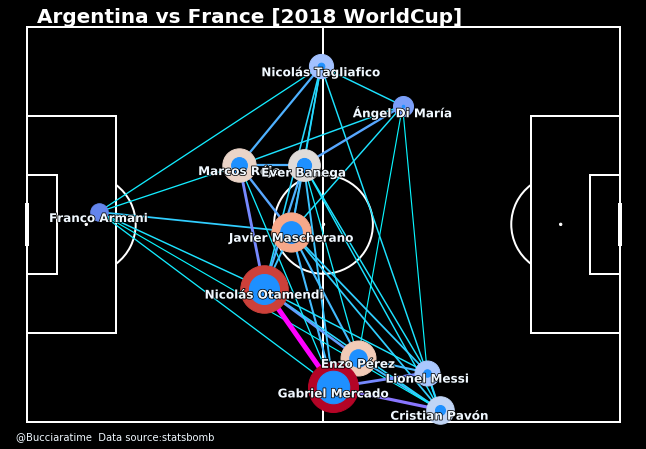

In [329]:
fig, ax = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(
    pitch_type='statsbomb', 
    orientation='horizontal',
    pitch_color='black',
    line_color='white',
    figsize=(13.5,8),
    constrained_layout=False, 
    tight_layout=True
)
pitch.draw(ax=ax)

ax = draw_pass_map(ax, player_position, 
                   player_pass_count, player_pass_value,
                   pair_pass_count, pair_pass_value)


plt.gca().invert_yaxis()
# plt.gcf().text(1,0,"@Bucciaratimes",fontsize=16)
# plt.gcf().text(0,1,"Data Source: Fbref.com",fontsize=16)
fig.savefig(f'/work/output/argentina/passmap_{opponent_name}.png', bbox_inches='tight')

In [330]:
df_passes = event1[
    (event1['type_name']=='Pass')&
    (event1['pass_outcome_name'].isna())&
    (event1['team_name']==pickup_team)&
    (event1['minute']<90)
                  ].copy()

df_passes['pass_recipient_name'] = df_passes['pass_recipient_name'].apply(
                        lambda x:player_dict[x] if player_dict[x] else x
)

df_passes['player_name'] = df_passes['player_name'].apply(
                        lambda x:player_dict[x] if player_dict[x] else x
)


df_passes['origin_pos_x'] = [loc[0] for loc in df_passes['location']]
df_passes['origin_pos_y'] = [loc[1] for loc in df_passes['location']]

player_position = df_passes.groupby('player_name').agg(
    {'origin_pos_x': 'median', 'origin_pos_y': 'median'}
)
# mode = df_passes.groupby('player_name')['origin_pos_x'].apply(lambda x:x.mode())
# mode

player_pass_count = df_passes.groupby('player_name').size().to_frame('num_passes')

player_pass_value = df_passes.groupby("player_name").size().to_frame("pass_value")


df_passes['pair_key'] = df_passes.apply(
    lambda x:'_'.join(sorted([x['player_name'], x['pass_recipient_name']]))
, axis=1)
# apply axis=1 ->行

pair_pass_count = df_passes.groupby('pair_key').size().to_frame('num_pasess')
pair_pass_value = df_passes.groupby('pair_key').size().to_frame('pass_value')

pair_pass_count

,num_pasess
pair_key,
Cristian Pavón_Enzo Pérez,7
Cristian Pavón_Federico Fazio,1
Cristian Pavón_Franco Armani,3
Cristian Pavón_Gabriel Mercado,17
Cristian Pavón_Javier Mascherano,5
...,...
Nicolás Tagliafico_Sergio Agüero,1
Nicolás Tagliafico_Ángel Di María,9
Nicolás Tagliafico_Éver Banega,5


In [331]:
print(ax)

AxesSubplot(0.187113,0.125;0.650774x0.755)


In [332]:
event1['pass_outcome_name']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3544    NaN
3545    NaN
3546    NaN
3547    NaN
3548    NaN
Name: pass_outcome_name, Length: 3549, dtype: object

In [333]:
player_position

,origin_pos_x,origin_pos_y
player_name,,
Cristian Pavón,83.0,78.0
Enzo Pérez,66.0,65.5
Federico Fazio,40.5,54.5
Franco Armani,16.5,37.5
Gabriel Mercado,61.0,72.0
...,...,...
Nicolás Otamendi,49.0,48.0
Nicolás Tagliafico,68.0,7.0
Sergio Agüero,82.0,26.0
